## Import Library dan Membaca Dataset

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

df = pd.read_csv('mushrooms.csv')

## Praproses Data

In [12]:
df.shape

(8124, 23)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [15]:
df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [17]:
df.isnull().sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


In [19]:
df.duplicated().sum()

0

In [10]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


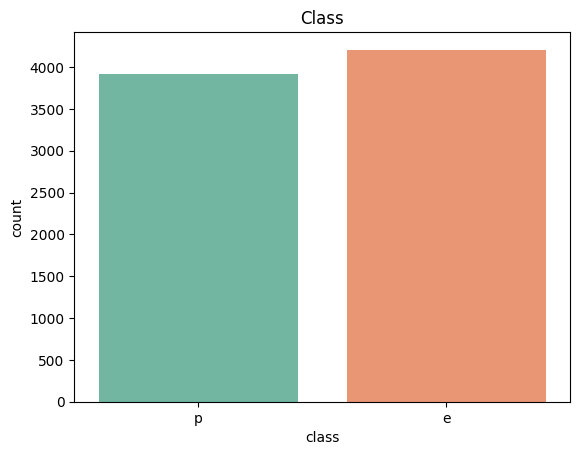

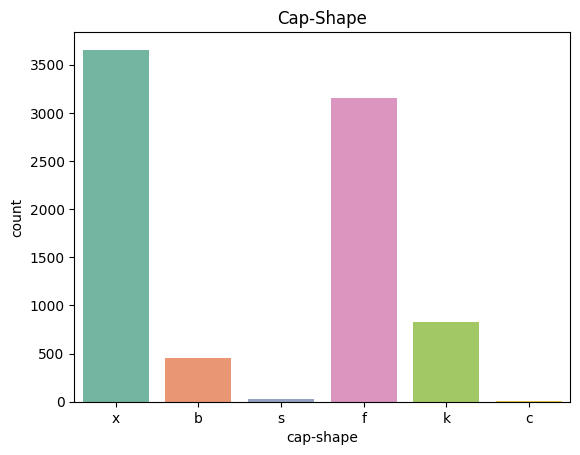

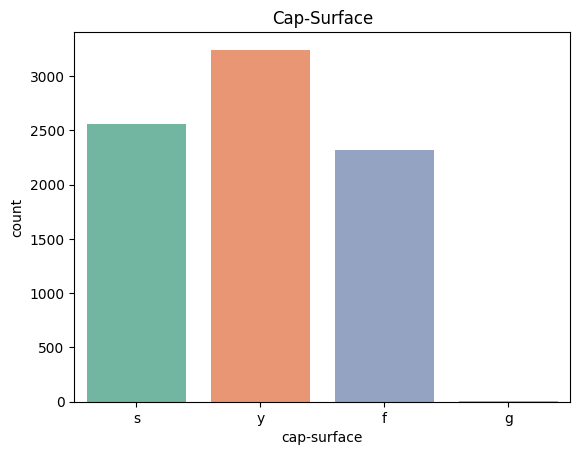

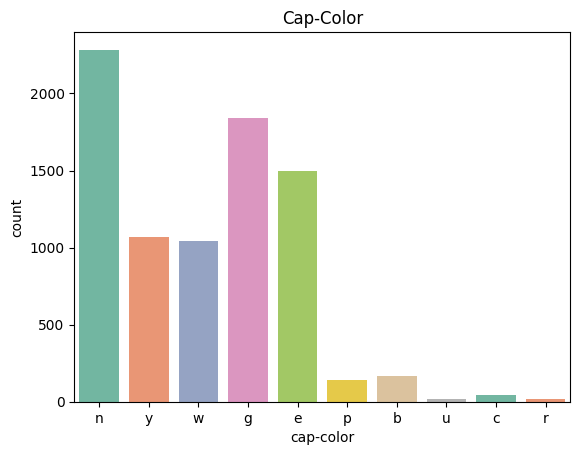

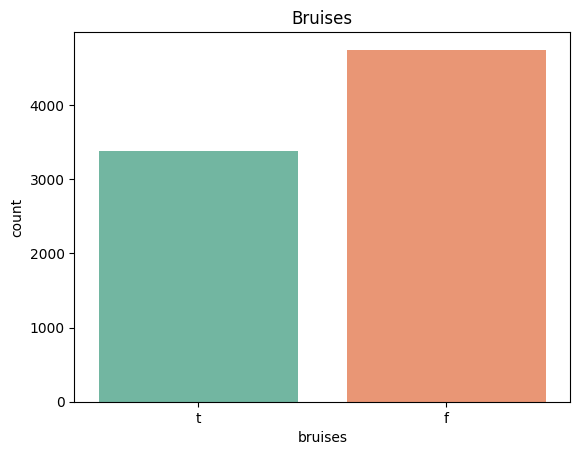

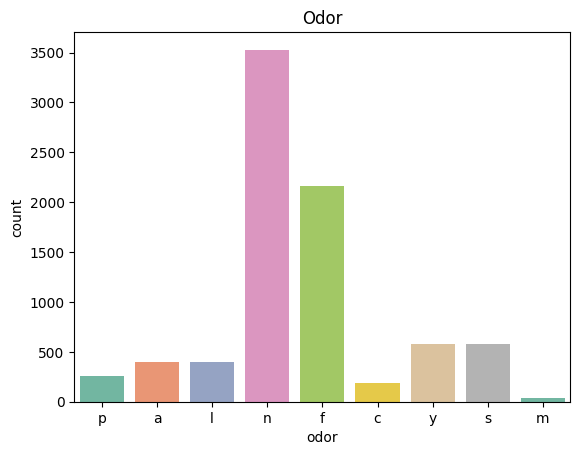

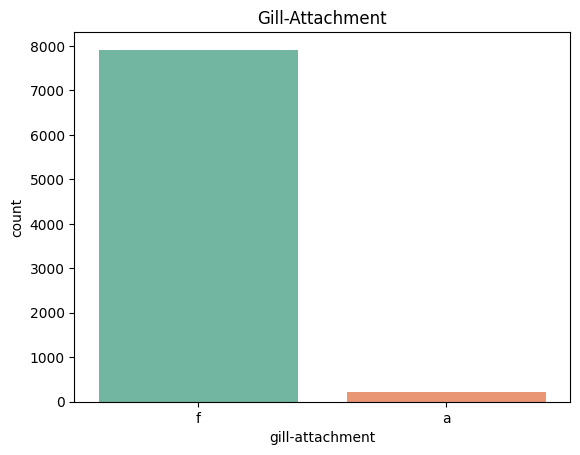

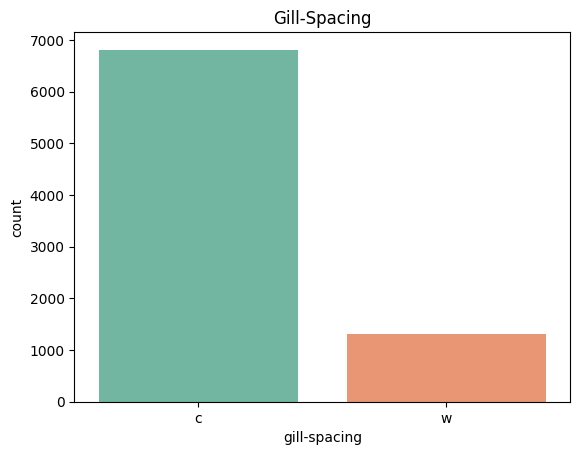

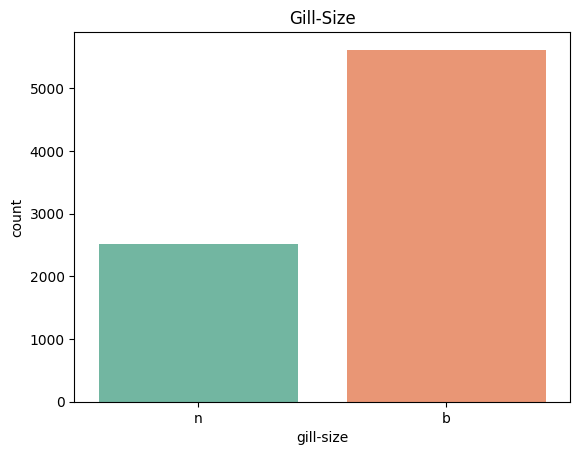

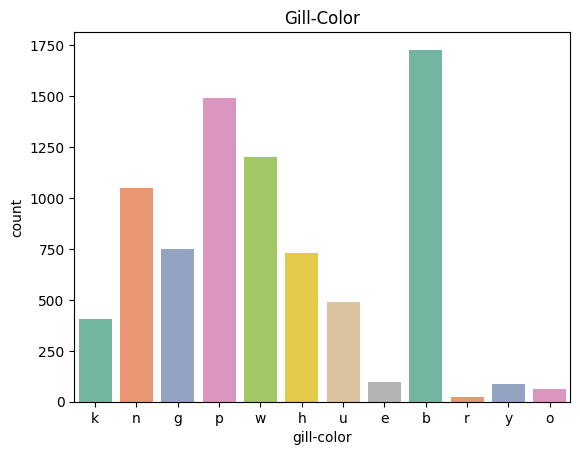

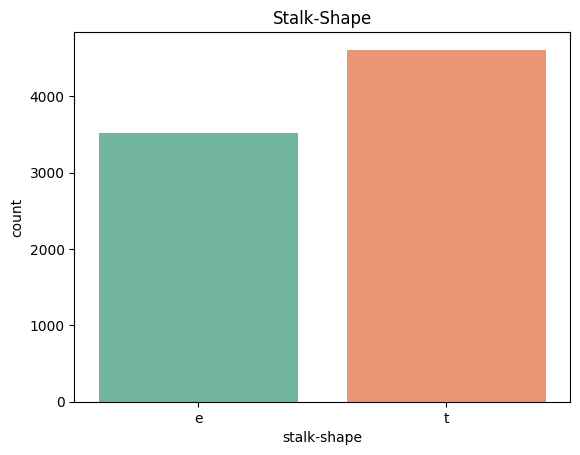

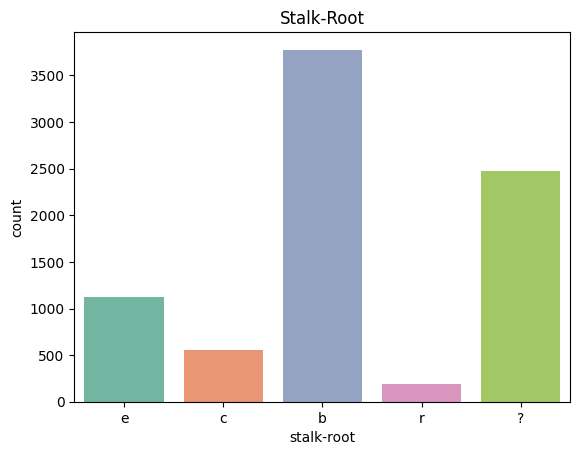

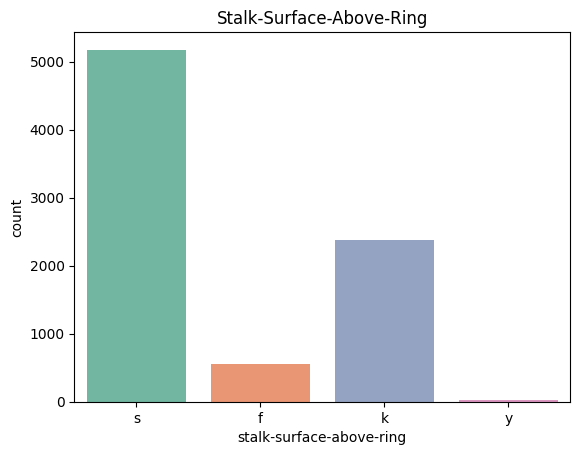

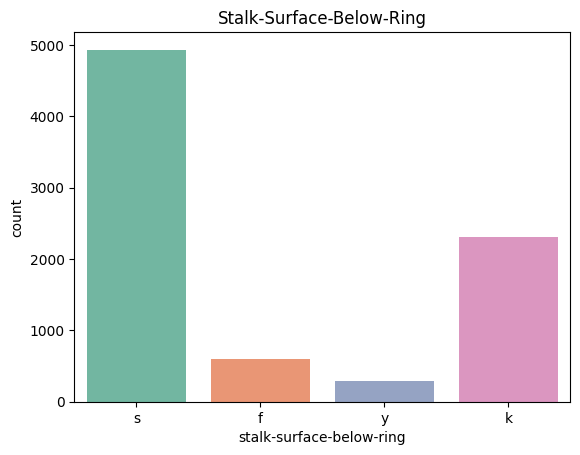

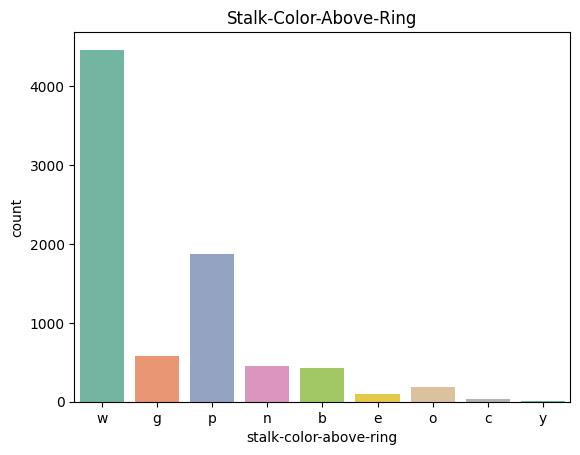

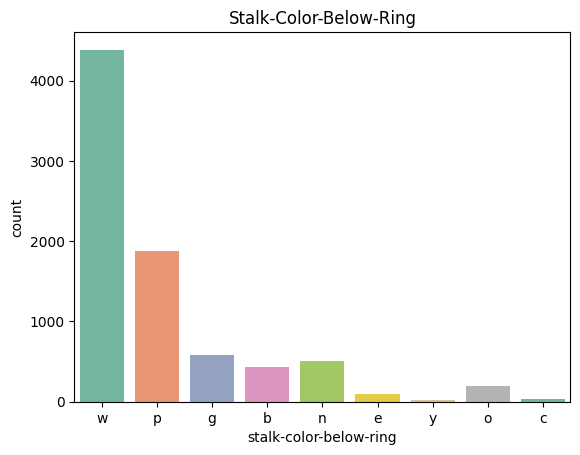

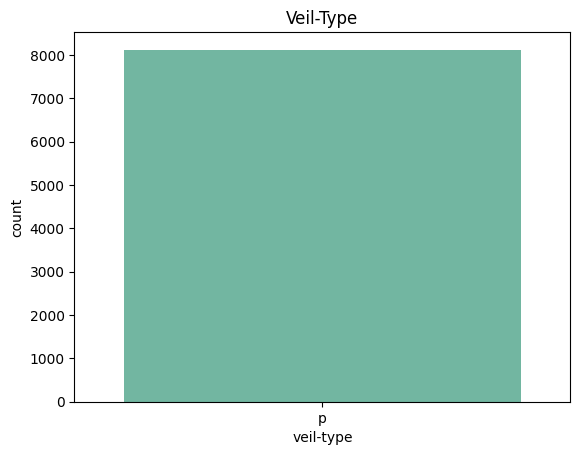

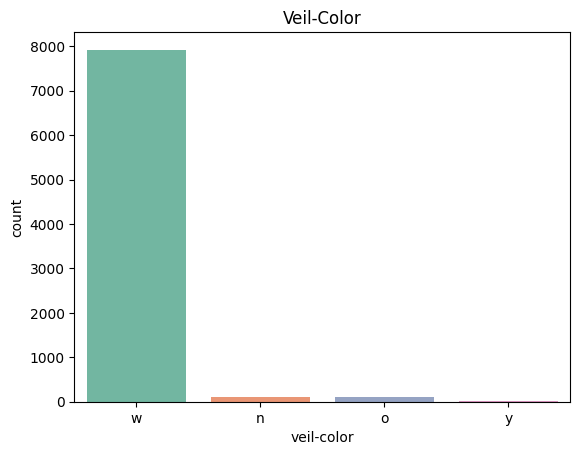

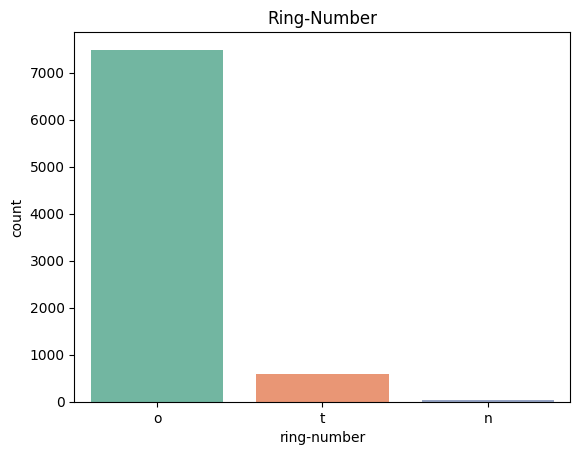

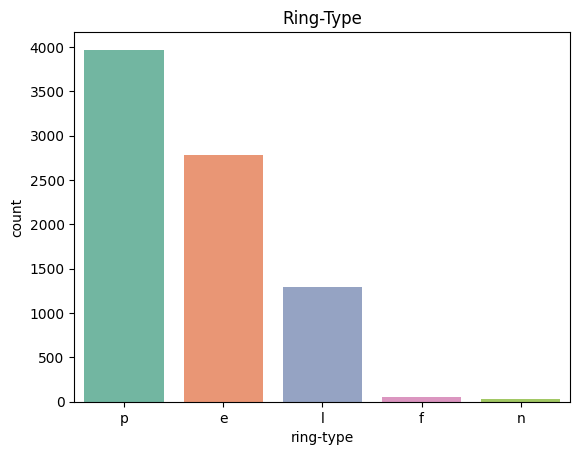

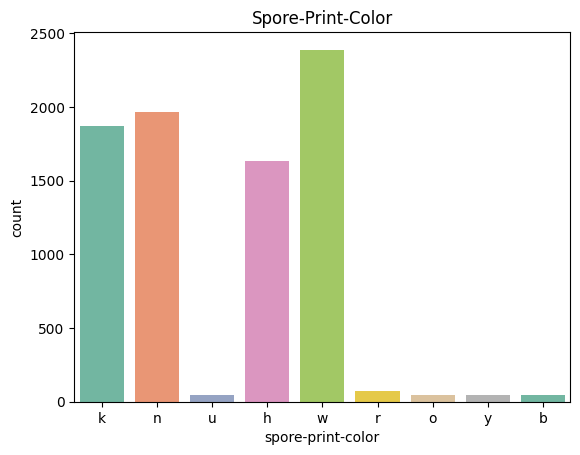

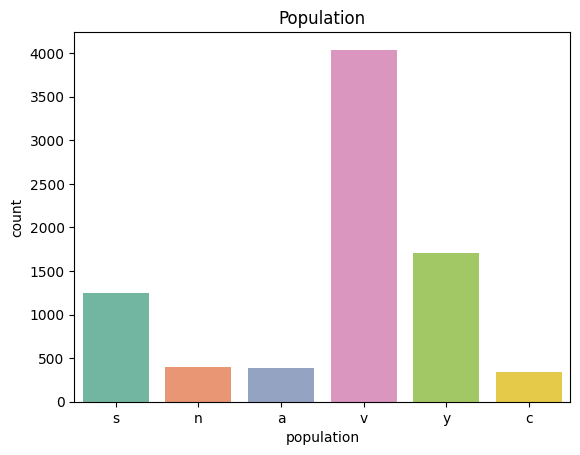

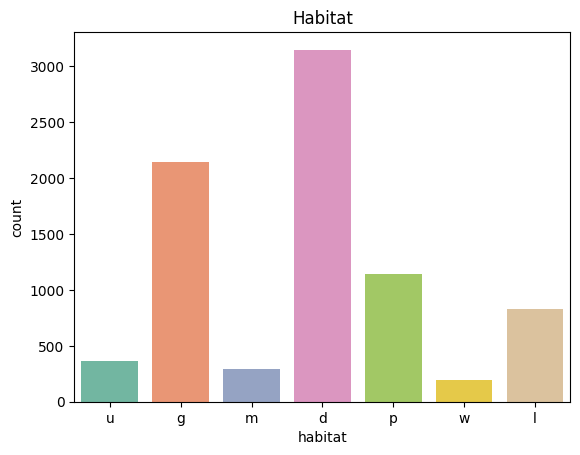

In [30]:
for i in df.columns:
    sns.countplot(data=df, x=i, hue=i, palette='Set2', legend=False)
    plt.title(i.title())
    plt.show()

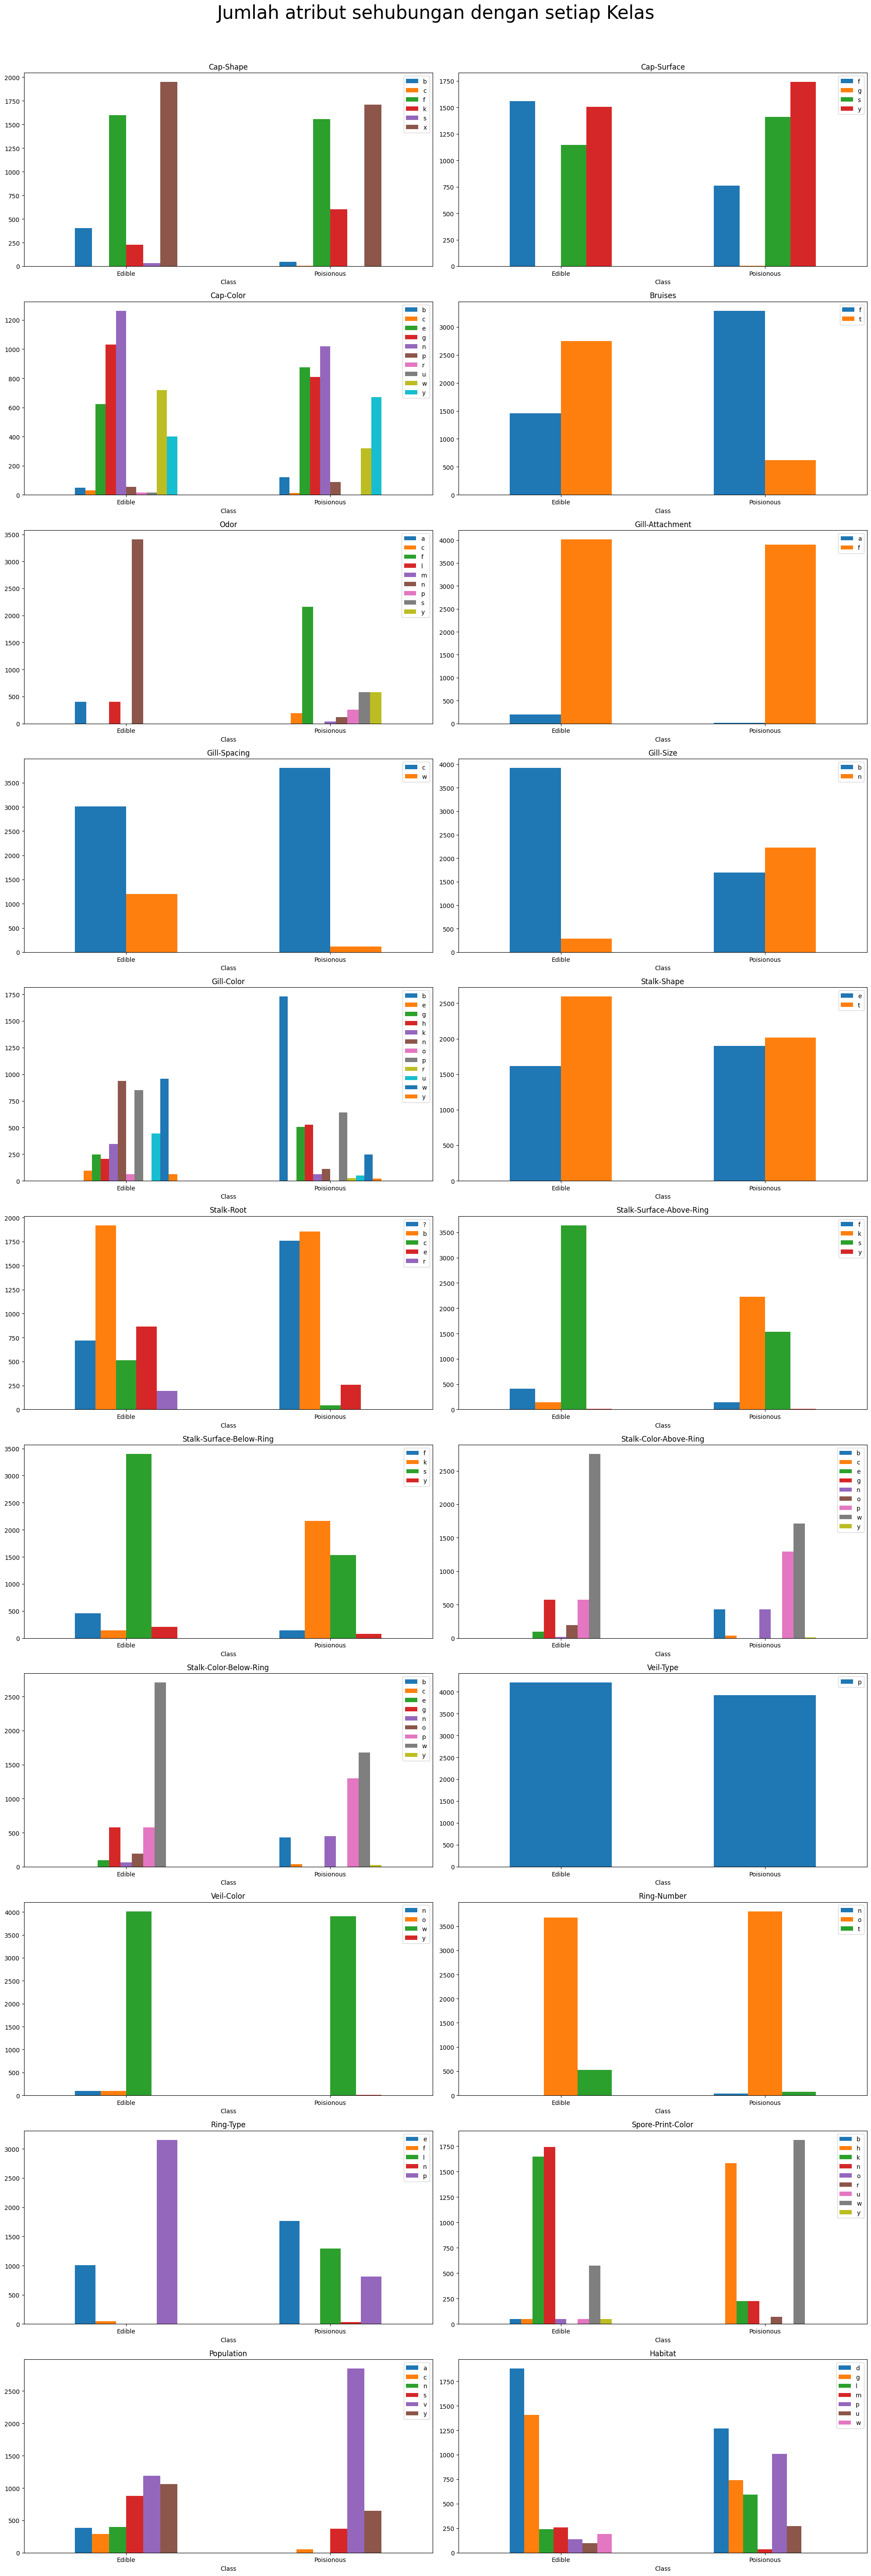

In [31]:
cols = list(df.columns)
cols.remove('class')

fig,axes = plt.subplots(nrows=11,ncols=2,figsize=(20,60))

axes = axes.flatten()

for i,j in enumerate(cols):
    df.loc[:,['class',j]].groupby('class').value_counts().unstack().plot(kind='bar',stacked=False,ax=axes[i])
    axes[i].set_title(cols[i].title())
    axes[i].set_xlabel('Class')
    axes[i].set_xticks(rotation=0,ticks=[0,1],labels=['Edible','Poisionous'])
    axes[i].legend(loc=1)
plt.tight_layout(rect=[0,0,1,0.96])
plt.suptitle('Jumlah atribut sehubungan dengan setiap Kelas',fontsize=30);

In [32]:
X = df.drop('class',axis=1)
y = df['class']

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=24)

## Proses Encoding

In [33]:
shape_encoder = LabelEncoder()
X_train.iloc[:,0] = shape_encoder.fit_transform(X_train.iloc[:,0])
X_test.iloc[:,0] = shape_encoder.transform(X_test.iloc[:,0])

surface_encoder = LabelEncoder()
X_train.iloc[:,1] = surface_encoder.fit_transform(X_train.iloc[:,1])
X_test.iloc[:,1] = surface_encoder.transform(X_test.iloc[:,1])

color_encoder = LabelEncoder()
X_train.iloc[:,2] = color_encoder.fit_transform(X_train.iloc[:,2])
X_test.iloc[:,2] = color_encoder.transform(X_test.iloc[:,2])

bruise_encoder = LabelEncoder()
X_train.iloc[:,3] = bruise_encoder.fit_transform(X_train.iloc[:,3])
X_test.iloc[:,3] = bruise_encoder.transform(X_test.iloc[:,3])

odor_encoder = LabelEncoder()
X_train.iloc[:,4] = odor_encoder.fit_transform(X_train.iloc[:,4])
X_test.iloc[:,4] = odor_encoder.transform(X_test.iloc[:,4])

attachment_encoder = LabelEncoder()
X_train.iloc[:,5] = attachment_encoder.fit_transform(X_train.iloc[:,5])
X_test.iloc[:,5] = attachment_encoder.transform(X_test.iloc[:,5])

spacing_encoder = LabelEncoder()
X_train.iloc[:,6] = spacing_encoder.fit_transform(X_train.iloc[:,6])
X_test.iloc[:,6] = spacing_encoder.transform(X_test.iloc[:,6])

size_encoder = LabelEncoder()
X_train.iloc[:,7] = size_encoder.fit_transform(X_train.iloc[:,7])
X_test.iloc[:,7] = size_encoder.transform(X_test.iloc[:,7])

gill_color_encoder = LabelEncoder()
X_train.iloc[:,8] = gill_color_encoder.fit_transform(X_train.iloc[:,8])
X_test.iloc[:,8] = gill_color_encoder.transform(X_test.iloc[:,8])

stalk_shape_encoder = LabelEncoder()
X_train.iloc[:,9] = stalk_shape_encoder.fit_transform(X_train.iloc[:,9])
X_test.iloc[:,9] = stalk_shape_encoder.transform(X_test.iloc[:,9])

root_encoder = LabelEncoder()
X_train.iloc[:,10] = root_encoder.fit_transform(X_train.iloc[:,10])
X_test.iloc[:,10] = root_encoder.transform(X_test.iloc[:,10])

above_surface_encoder = LabelEncoder()
X_train.iloc[:,11] = above_surface_encoder.fit_transform(X_train.iloc[:,11])
X_test.iloc[:,11] = above_surface_encoder.transform(X_test.iloc[:,11])

below_surface_encoder = LabelEncoder()
X_train.iloc[:,12] = below_surface_encoder.fit_transform(X_train.iloc[:,12])
X_test.iloc[:,12] = below_surface_encoder.transform(X_test.iloc[:,12])

above_color_encoder = LabelEncoder()
X_train.iloc[:,13] = above_color_encoder.fit_transform(X_train.iloc[:,13])
X_test.iloc[:,13] = above_color_encoder.transform(X_test.iloc[:,13])

below_color_encoder = LabelEncoder()
X_train.iloc[:,14] = below_color_encoder.fit_transform(X_train.iloc[:,14])
X_test.iloc[:,14] = below_color_encoder.transform(X_test.iloc[:,14])

veil_type_encoder = LabelEncoder()
X_train.iloc[:,15] = veil_type_encoder.fit_transform(X_train.iloc[:,15])
X_test.iloc[:,15] = veil_type_encoder.transform(X_test.iloc[:,15])

veil_color_encoder = LabelEncoder()
X_train.iloc[:,16] = veil_color_encoder.fit_transform(X_train.iloc[:,16])
X_test.iloc[:,16] = veil_color_encoder.transform(X_test.iloc[:,16])

number_encoder = LabelEncoder()
X_train.iloc[:,17] = number_encoder.fit_transform(X_train.iloc[:,17])
X_test.iloc[:,17] = number_encoder.transform(X_test.iloc[:,17])

type_encoder = LabelEncoder()
X_train.iloc[:,18] = type_encoder.fit_transform(X_train.iloc[:,18])
X_test.iloc[:,18] = type_encoder.transform(X_test.iloc[:,18])

spore_encoder = LabelEncoder()
X_train.iloc[:,19] = spore_encoder.fit_transform(X_train.iloc[:,19])
X_test.iloc[:,19] = spore_encoder.transform(X_test.iloc[:,19])

population_encoder = LabelEncoder()
X_train.iloc[:,20] = population_encoder.fit_transform(X_train.iloc[:,20])
X_test.iloc[:,20] = population_encoder.transform(X_test.iloc[:,20])

habitat_encoder = LabelEncoder()
X_train.iloc[:,21] = habitat_encoder.fit_transform(X_train.iloc[:,21])
X_test.iloc[:,21] = habitat_encoder.transform(X_test.iloc[:,21])

class_encoder = LabelEncoder()
y_train = class_encoder.fit_transform(y_train)
y_test = class_encoder.transform(y_test)

## Proses Train Data

In [34]:
X_train = X_train.astype('int')
X_test = X_test.astype('int')

## Model Sequential

In [35]:
model = Sequential(
    [Dense(48,activation='relu',input_shape=(X_train.shape[1],)),
    Dense(48,activation='relu'),
    Dense(1,activation='sigmoid')]
)

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 48)                  │           1,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 48)                  │           2,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              49 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,505 (13.69 KB)

 Trainable params: 3,505 (13.69 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
history = model.fit(X_train,pd.Series(y_train),validation_data=(X_test,y_test),epochs=5)

Epoch 1/5
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7768 - loss: 0.4650 - val_accuracy: 0.9311 - val_loss: 0.1897
Epoch 2/5
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9480 - loss: 0.1594 - val_accuracy: 0.9662 - val_loss: 0.1016
Epoch 3/5
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9708 - loss: 0.0895 - val_accuracy: 0.9809 - val_loss: 0.0576
Epoch 4/5
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9788 - loss: 0.0570 - val_accuracy: 0.9908 - val_loss: 0.0337
Epoch 5/5
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9964 - loss: 0.0273 - val_accuracy: 0.9975 - val_loss: 0.0177


## Evaluasi

In [37]:
loss,accuracy = model.evaluate(X_test,y_test)

print(accuracy)
print(loss)

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9978 - loss: 0.0185
0.9975384473800659
0.01772337593138218


In [38]:
accuracy_score(y_true=y_test.reshape(-1,1),y_pred=(model.predict(X_test)>0.5).astype(int))

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


0.9975384615384615

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


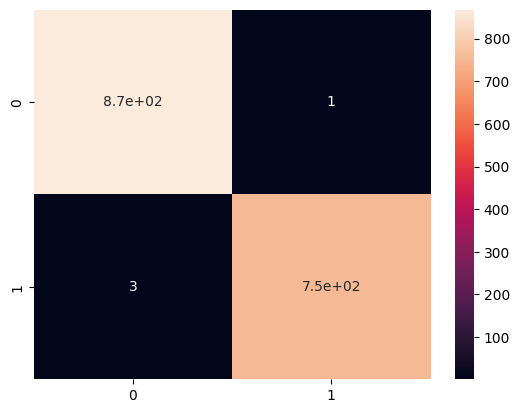

In [41]:
sns.heatmap(confusion_matrix(y_pred=(model.predict(X_test)>0.5).astype(int),y_true=y_test.reshape(-1,1)),annot=True);

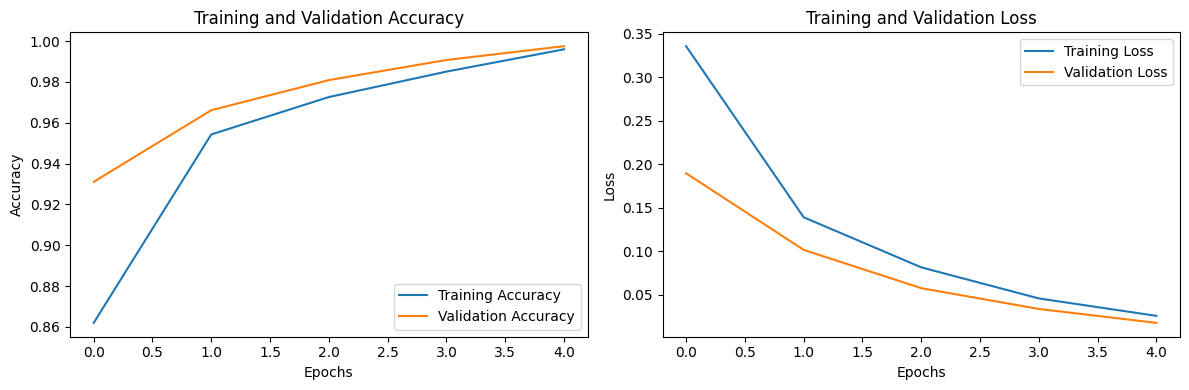

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()
